# BCM
I am considering the following system

\begin{equation}
    \left\{\begin{aligned}
    &\dot{w} = w \, (w - \theta)\\
    &\dot{\theta} = -\frac{1}{\tau} \, (\theta - w^2)
    \end{aligned}\right.
\end{equation}

In [1]:
from functools import partial
from scipy.integrate import solve_ivp


import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
rcParams['axes.prop_cycle'] = cycler(color=plt.get_cmap('tab20').colors)
rcParams['text.usetex']=True
rcParams['font.family']='serif'

import numpy as np
rng = np.random.default_rng(seed=2025)


In [2]:
def free_RHS(t,x,tau):
    w, theta = x
    return (
        w * (w - theta),
        (-theta + w**2)/tau
    )

def plotter(axs, tau, c, inset=False):

    
    RHS = partial(free_RHS, tau=tau)

    # Upper plot
    ax = axs[0]
    res = solve_ivp(RHS, t_span=[0,100], y0=(0.5,0.5), method='LSODA')
    ax.plot(res.t, res.y[0], c=c, linewidth=1, label=r'$w$')
    ax.plot(res.t, res.y[1], c=c, linestyle='--', linewidth=1, label=r'$\theta$')
    ax.legend(frameon=False, ncols=2, loc=(0.05,1), markerscale=0.3, fontsize=10)
    
    ax.set_ymargin(0.2)
    ax.set_xlabel('Time')
    ax.set_title(r'$\tau = {}$'.format(tau), y=1.6)

    # Lower plot
    y0s = rng.uniform(-3,3,size=(500,2))

    ax = axs[1]
    if inset:
        axins = ax.inset_axes(
            [0.6,0.1,0.3,0.3],
            xlim=(0.98,1.02), ylim=(0.98,1.02),
            xticklabels=[],
            yticklabels=[]
        )


    for y0  in y0s:
        res = solve_ivp(RHS, t_span=[0,100], y0=y0, method='LSODA')
        ax.plot(res.y[0], res.y[1], linewidth=0.5, c=c, alpha=0.1)
        if inset: axins.plot(res.y[0], res.y[1], linewidth=0.5, c=c, alpha=0.1)

    # Nullclines
    X = np.linspace(-3,3,100)
    ax.plot(X, X**2, c='black', linewidth=1)
    ax.plot(np.zeros(X.shape), X, c='black', linewidth=1)
    ax.plot(X, X, c='black', linewidth=1)

    # Fixed points
    ax.scatter(1,1,s=20, c='black', zorder=20)
    ax.scatter(0,0,s=20, c='black', zorder=20)
    if inset: axins.scatter(1,1, s=10, c='black', zorder=20)

    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_xlabel(r'$w$')
    ax.set_ylabel(r'$\theta$')


    if inset: ax.indicate_inset_zoom(axins, edgecolor='black')



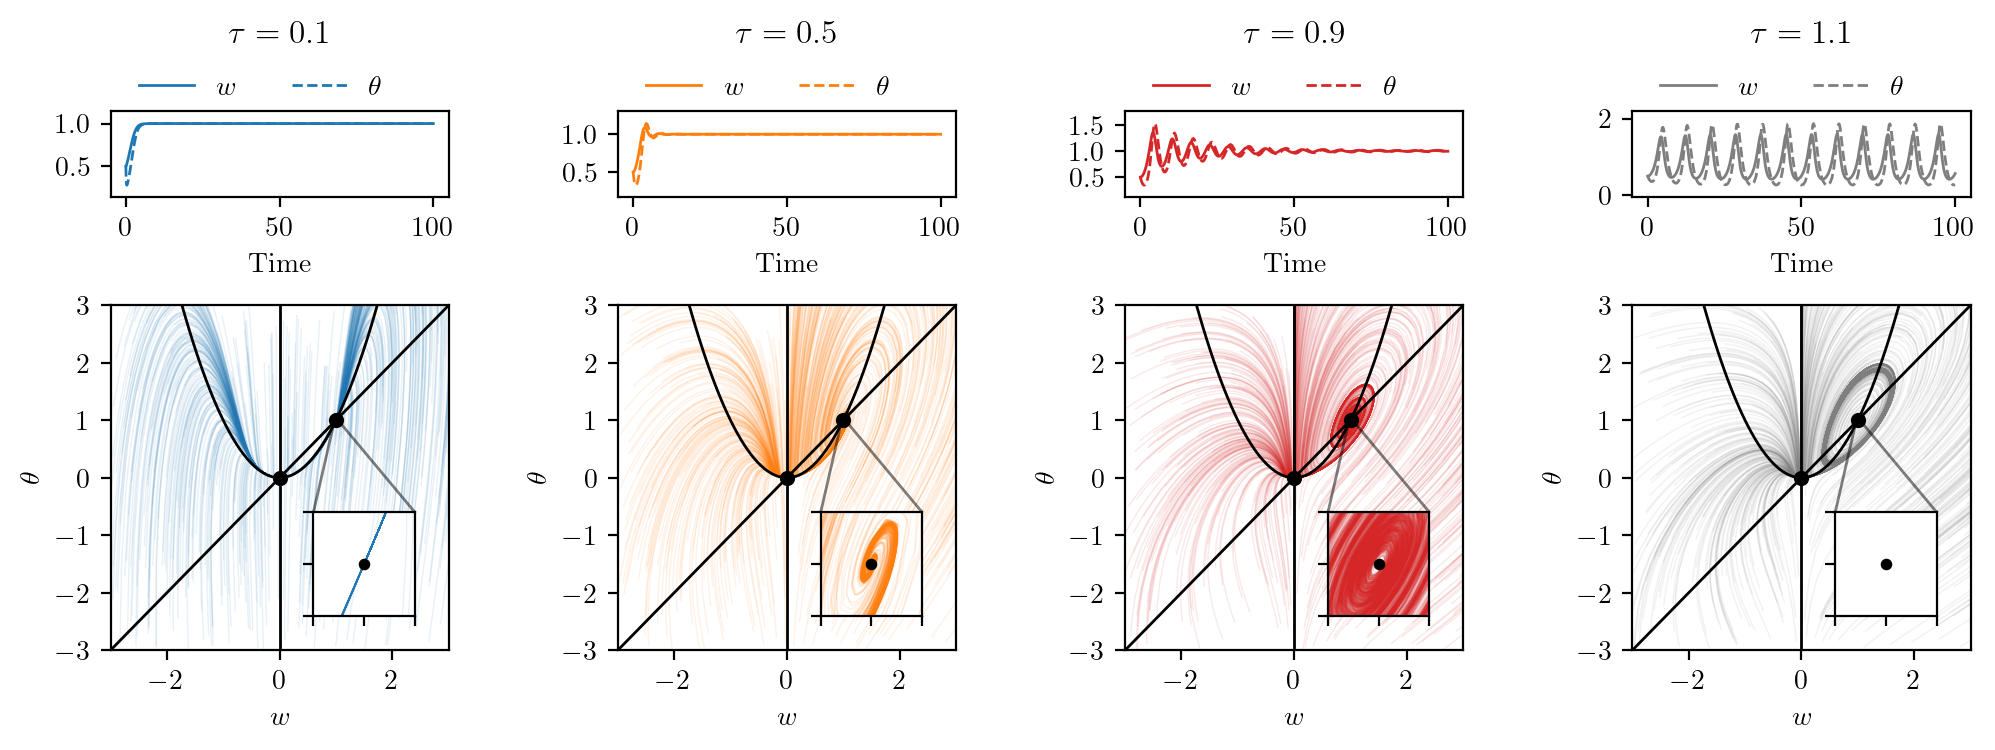

In [3]:
fig, axs = plt.subplots(2,4, height_ratios=(1,4), figsize=(12,3.5), dpi=200)
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plotter(axs[:,0], tau=0.1, c='tab:blue', inset=True)
plotter(axs[:,1], tau=0.5, c='tab:orange', inset=True)
plotter(axs[:,2], tau=0.9, c='tab:red', inset=True)
plotter(axs[:,3], tau=1.1, c='tab:gray', inset=True)

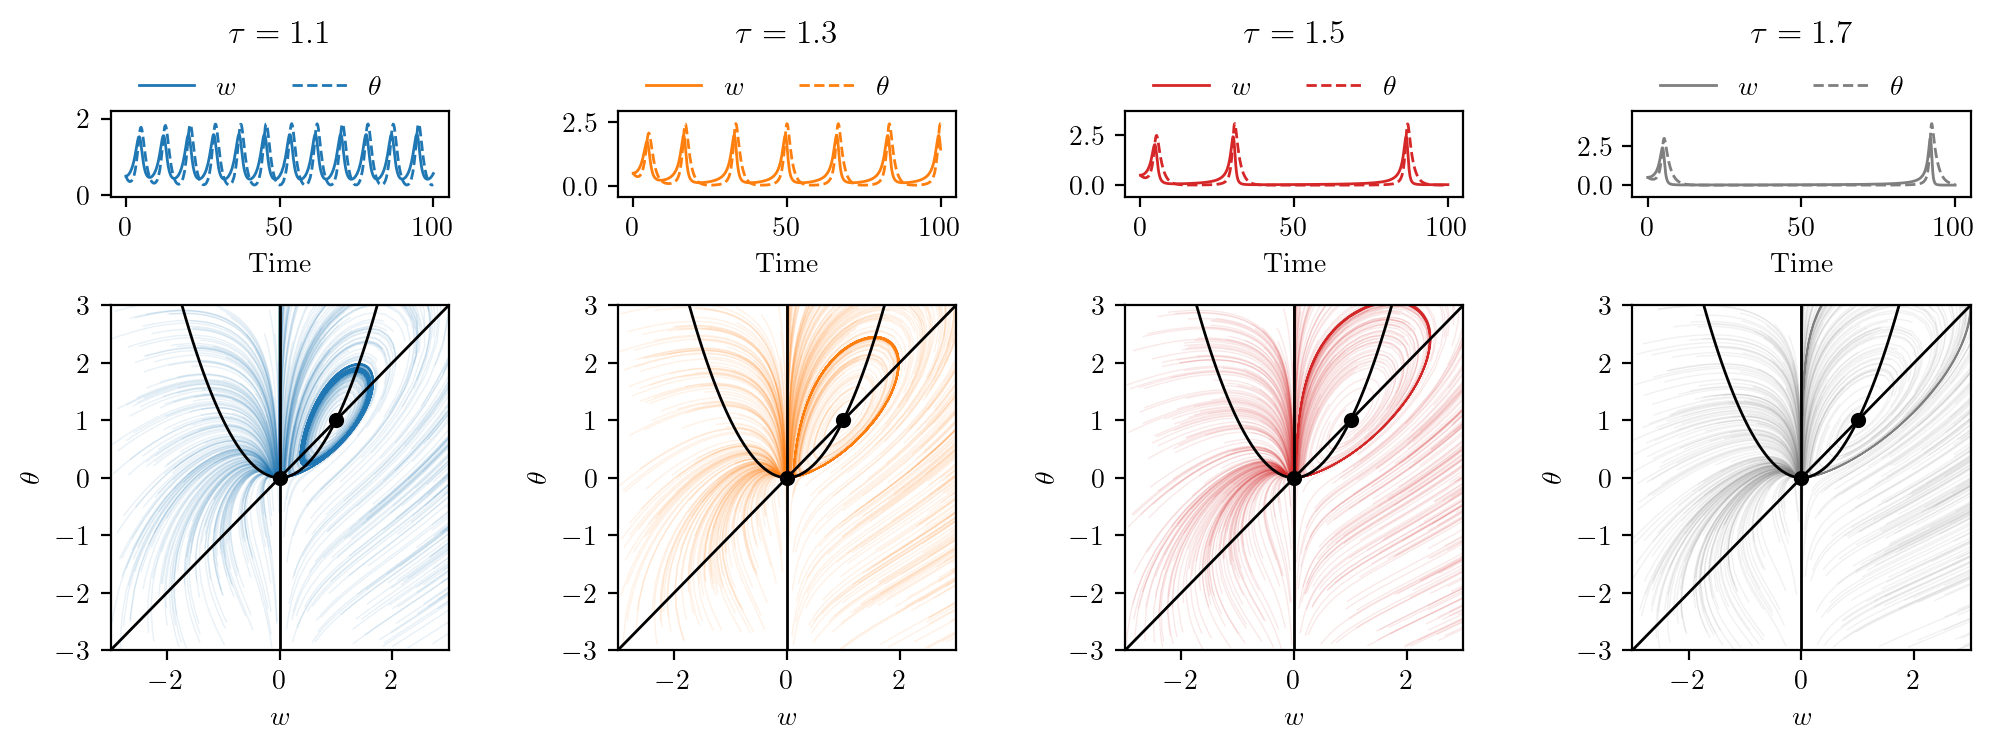

In [4]:
fig, axs = plt.subplots(2,4, height_ratios=(1,4), figsize=(12,3.5), dpi=200)
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plotter(axs[:,0], tau=1.1, c='tab:blue',)
plotter(axs[:,1], tau=1.3, c='tab:orange')
plotter(axs[:,2], tau=1.5, c='tab:red')
plotter(axs[:,3], tau=1.7, c='tab:gray')

Text(0, 0.5, 'counts')

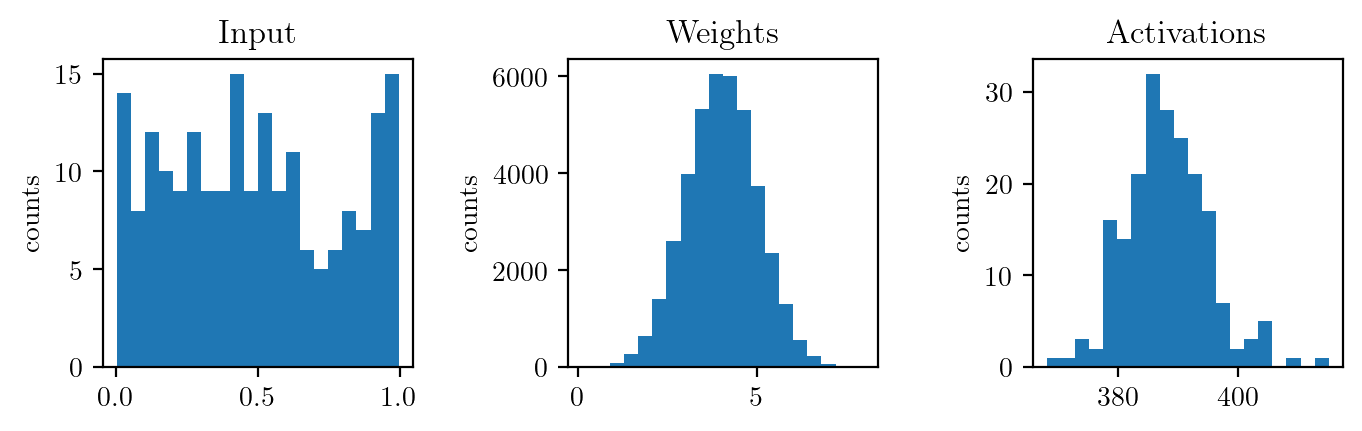

In [5]:
x = np.random.rand(200)
A = np.random.randn(200,200)+4

Y = A @ x

fig, axs = plt.subplots(1,3, figsize=(8,2), dpi=200)
fig.subplots_adjust(wspace=0.5)

axs[0].hist(x, bins=20)
axs[1].hist(A.flatten(), bins=20)
axs[2].hist(Y, bins=20)

axs[0].set_title('Input')
axs[0].set_ylabel('counts')
axs[1].set_title('Weights')
axs[1].set_ylabel('counts')
axs[2].set_title('Activations')
axs[2].set_ylabel('counts')

Text(0, 0.5, 'counts')

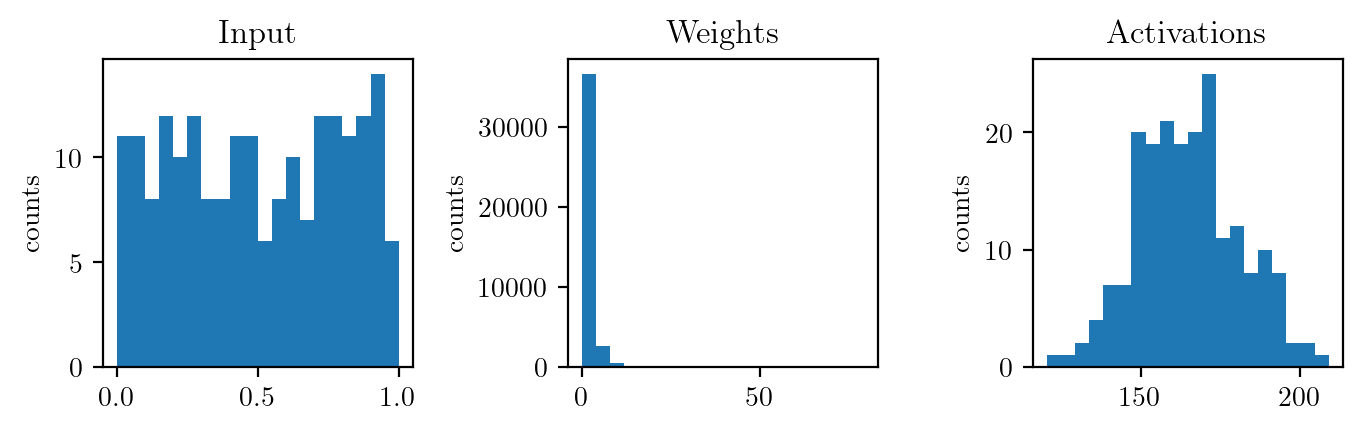

In [6]:
x = np.random.rand(200)
A = np.random.lognormal(size=(200,200))

Y = A @ x

fig, axs = plt.subplots(1,3, figsize=(8,2), dpi=200)
fig.subplots_adjust(wspace=0.5)

axs[0].hist(x, bins=20)
axs[1].hist(A.flatten(), bins=20)
axs[2].hist(Y, bins=20)

axs[0].set_title('Input')
axs[0].set_ylabel('counts')
axs[1].set_title('Weights')
axs[1].set_ylabel('counts')
axs[2].set_title('Activations')
axs[2].set_ylabel('counts')

In [8]:
from array import array

In [69]:
def free_RHS(t,x,a,b,I):
    v, u = x
    return np.array((
        0.04*v**2 + 5*v + 140 - u + I,
        a * (b*v - u)
    ))


yt = [np.array((-65,0))]
dt = 1e-3
steps = 100000
a = 0.02
b = 0.2
c = -50
d = 2
I = 20


for _ in range(steps):
    y = free_RHS(0, yt[-1],a,b,I)*dt + yt[-1]
    if y[0] > 30:
        y[0] = c
        y[1] = y[1] + d
    yt.append(y)

yt = np.stack(yt)
yt.shape


(100001, 2)

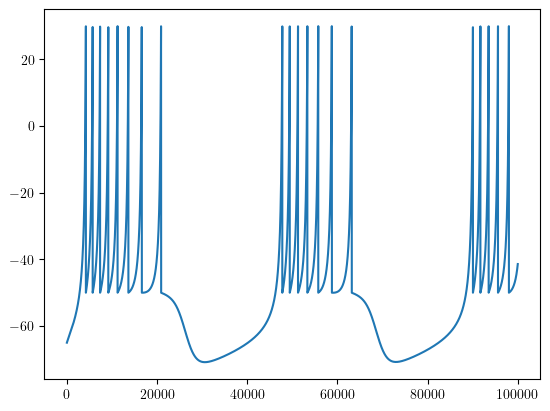

In [70]:
plt.plot(yt.T[0])